In [1]:
from ES import populational_isotropic_ES, populational_non_isotropic_ES, ESAlgorithm
import matplotlib.pyplot as plt
import numpy as np
from py_expression_eval import Parser
parser = Parser()


# ES populacionais
## ES isotrópico

In [16]:
alg = ESAlgorithm()
alg.set_evaluation_expression("(x + 2*y - 7)^2 + (2*x + y - 5)^2")
alg.set_variable_bounds("x", 10, True, -10, True)
alg.set_variable_bounds("y", 10, True, -10, True)

res = alg.populational_isotropic_ES(dimension_gen_interval=(-10, 10),  iter=20, seed=0, num_parents=10, num_offspring=100)

{'dim': {'x': 1.0035795495161255, 'y': 2.9954848652380104}, 'sigma': 0.08871216938878182, 'eval': 3.6700895666435846e-05}
{'dim': {'x': 1.006690465786801, 'y': 2.9938659559796674}, 'sigma': 0.026351338249677097, 'eval': 8.362724921653176e-05}
{'dim': {'x': 1.0052765418652851, 'y': 2.9930166354629786}, 'sigma': 0.053426656203650565, 'eval': 8.826224884404317e-05}
{'dim': {'x': 1.0018652883277563, 'y': 3.003035785830112}, 'sigma': 0.032444421962775576, 'eval': 0.00010877740775566904}
{'dim': {'x': 1.0054485179229897, 'y': 2.9997871394169207}, 'sigma': 0.08639273211283474, 'eval': 0.00013938008830881294}
{'dim': {'x': 0.9904045511997204, 'y': 3.0068058580533403}, 'sigma': 0.024032209980340485, 'eval': 0.00016951960766264254}
{'dim': {'x': 0.9920966327292999, 'y': 3.0104659260459523}, 'sigma': 0.0235113024752404, 'eval': 0.00019826565212141095}
{'dim': {'x': 1.0046877875354547, 'y': 3.0018962720327824}, 'sigma': 0.03033701068240804, 'eval': 0.00019897056119225095}
{'dim': {'x': 1.009606196

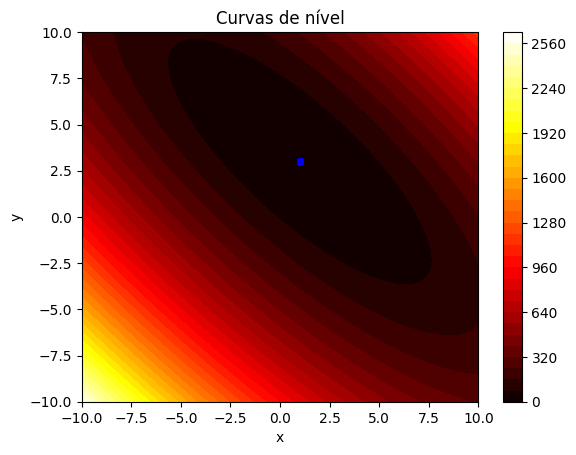

In [19]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]

#plt.plot(x_array, y_array, 'ro', markersize=4)
#plt.axis([-10, 10, -10, 10])
#plt.show()
print('\n'.join([str(d) for d in res]))


@np.vectorize
def f(x,y):
    return parser.parse("(x + 2*y - 7)^2 + (2*x + y - 5)^2").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()


In [20]:
alg = ESAlgorithm()
alg.set_evaluation_expression("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))")
alg.set_variable_bounds("x", 10, True, -10, True)
alg.set_variable_bounds("y", 10, True, -10, True)

res = alg.populational_isotropic_ES(dimension_gen_interval=(-10, 10), sigma_var=0.5, iter=10, seed=0, num_parents=1000, num_offspring=2000)


{'dim': {'x': -8.054410471129, 'y': -9.662300094756377}, 'sigma': 0.23575112200527146, 'eval': -19.208445696498586}
{'dim': {'x': -8.051676069769108, 'y': 9.66492637904493}, 'sigma': 0.22520267192823754, 'eval': -19.208391268214058}
{'dim': {'x': 8.055574105643604, 'y': -9.661269569503341}, 'sigma': 0.04991293979083631, 'eval': -19.2083889528762}
{'dim': {'x': 8.050631260230626, 'y': -9.665750783484736}, 'sigma': 0.0760472198492213, 'eval': -19.20830011004482}
{'dim': {'x': 8.04990625710265, 'y': -9.667983383473914}, 'sigma': 0.0763714459576515, 'eval': -19.208132593870285}
{'dim': {'x': -8.055091058986976, 'y': -9.658507625186465}, 'sigma': 0.33877564504204044, 'eval': -19.20813012356725}
{'dim': {'x': -8.048691579382655, 'y': 9.662709316088296}, 'sigma': 0.07679474220528705, 'eval': -19.208069125371473}
{'dim': {'x': -8.048595936963222, 'y': 9.662750961598812}, 'sigma': 0.15906084163589848, 'eval': -19.208058690704327}
{'dim': {'x': -8.061634629805999, 'y': 9.662926506041007}, 'sigma

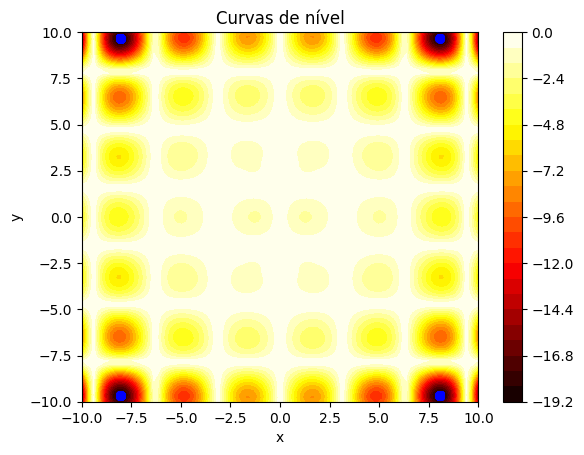

In [21]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]

print('\n'.join([str(d) for d in res]))


@np.vectorize
def f(x,y):
    return parser.parse("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 25, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

In [31]:
alg = ESAlgorithm()
alg.set_evaluation_expression("100*sqrt(abs(y-0.01*x^2)) + 0.01*abs(x+10)")
alg.set_variable_bounds("x", -5, True, -15, True)
alg.set_variable_bounds("y", 3, True, -3, True)


res = alg.populational_isotropic_ES(dimension_gen_interval=(-15, 15), sigma_var=0.5, iter=10, seed=0, num_parents=1000,num_offspring=2000)

{'dim': {'y': 0.7198142368512361, 'x': -8.484262112132695}, 'sigma': 0.09310676712688304, 'eval': 0.37291459358319257}
{'dim': {'y': 0.26266902535835124, 'x': -5.125340418217305}, 'sigma': 0.045041765044295745, 'eval': 0.5190514731913662}
{'dim': {'y': 0.2525977758866792, 'x': -5.026370521520693}, 'sigma': 0.0521379435003118, 'eval': 0.7296650369548545}
{'dim': {'y': 0.6996075011193593, 'x': -8.363913013581705}, 'sigma': 0.03411586962602698, 'eval': 0.7719542244228218}
{'dim': {'y': 0.25057371062186623, 'x': -5.005185265211744}, 'sigma': 0.05652553418636734, 'eval': 0.7909962627806513}
{'dim': {'y': 0.3241939805028422, 'x': -5.694455279409813}, 'sigma': 0.46075435299479645, 'eval': 0.9046167575066066}
{'dim': {'y': 0.2500759154509776, 'x': -5}, 'sigma': 0.09886668270711046, 'eval': 0.9212947318653205}
{'dim': {'y': 0.26543846889362177, 'x': -5.152820438451163}, 'sigma': 0.02765975751267691, 'eval': 0.9266279068996133}
{'dim': {'y': 0.2841597109851406, 'x': -5.331493139553113}, 'sigma':

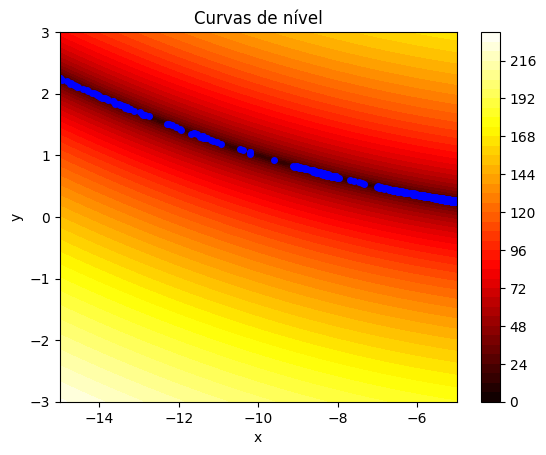

In [32]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]
print('\n'.join([str(d) for d in res]))

@np.vectorize
def f(x,y):
    return parser.parse("100*sqrt(abs(y-0.01*x^2)) + 0.01*abs(x+10)").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-15, -5, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

## ES não isotrópico

In [34]:
def allowed_interval(**kwargs):
    if -10 <= kwargs['x'] <= 10 and -10 <= kwargs['y'] <= 10:
        return True
    return False

alg = ESAlgorithm()
alg.set_evaluation_expression("(x + 2*y - 7)^2 + (2*x + y - 5)^2")
alg.set_variable_bounds("x", 10, True, -10, True)
alg.set_variable_bounds("y", 10, True, -10, True)


res = alg.populational_non_isotropic_ES(dimension_gen_interval=(-10, 10), sigma_var=0.5, iter=10,seed=0, num_parents=1000, num_offspring=2000)

{'dim': {'x': 0.9970874928890484, 'y': 3.0032177042813526}, 'sigma': {'x': 0.1428759268861852, 'y': 0.1365920887884419}, 'eval': 1.92088997648619e-05}
{'dim': {'x': 1.0075051588090802, 'y': 2.99222820052783}, 'sigma': {'x': 0.5987138132972821, 'y': 0.5431985983921417}, 'eval': 0.00011701266475799889}
{'dim': {'x': 1.0055923700269112, 'y': 3.0002358925586226}, 'sigma': {'x': 0.2677139548539546, 'y': 0.12303419712868364}, 'eval': 0.00016720482688084874}
{'dim': {'x': 1.0038209045832973, 'y': 2.9912726219638106}, 'sigma': {'x': 0.2712242686147529, 'y': 0.5443890624734263}, 'eval': 0.00018706036619696234}
{'dim': {'x': 0.9915725191560765, 'y': 3.0029396646152304}, 'sigma': {'x': 0.19586633520459218, 'y': 0.04029363250504425}, 'eval': 0.00020012856926435068}
{'dim': {'x': 1.0072951473692182, 'y': 2.988955644987784}, 'sigma': {'x': 0.3999780821576128, 'y': 0.0801573068394957}, 'eval': 0.00023142318457573056}
{'dim': {'x': 1.0006402926912137, 'y': 3.010878717130912}, 'sigma': {'x': 0.27298631

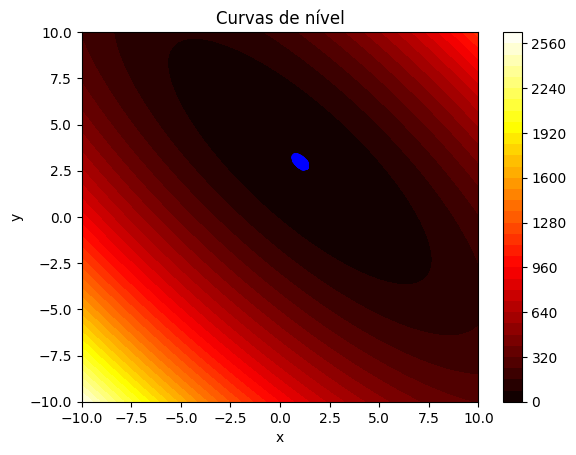

In [35]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]
print('\n'.join([str(d) for d in res]))

@np.vectorize
def f(x,y):
    return parser.parse("(x + 2*y - 7)^2 + (2*x + y - 5)^2").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

#print(x_array)
#print(y_array)

{'dim': {'x': 8.06175806979268, 'y': 9.65724966515202}, 'sigma': {'x': 0.2788119560823624, 'y': 0.35890625308141244}, 'eval': -19.207524397798323}
{'dim': {'x': 8.049837069897361, 'y': 9.654387178206958}, 'sigma': {'x': 0.2764294293442814, 'y': 0.5788511708273503}, 'eval': -19.207177490370103}
{'dim': {'x': -8.044425724678117, 'y': 9.659963871225667}, 'sigma': {'x': 0.1766220981309744, 'y': 0.4734497461492515}, 'eval': -19.207169586726156}
{'dim': {'x': 8.042950985271666, 'y': 9.663550591878138}, 'sigma': {'x': 0.1558341903304826, 'y': 0.23702683905994487}, 'eval': -19.207054089845133}
{'dim': {'x': -8.041969976311146, 'y': -9.659476438784544}, 'sigma': {'x': 0.1477423534990272, 'y': 0.2699166660265176}, 'eval': -19.20654632276098}
{'dim': {'x': -8.040732548134411, 'y': -9.664868661086844}, 'sigma': {'x': 0.17109983401360573, 'y': 0.13378514379563852}, 'eval': -19.206493089332987}
{'dim': {'x': -8.069633388792557, 'y': -9.666739679649654}, 'sigma': {'x': 0.22949719927131773, 'y': 0.279

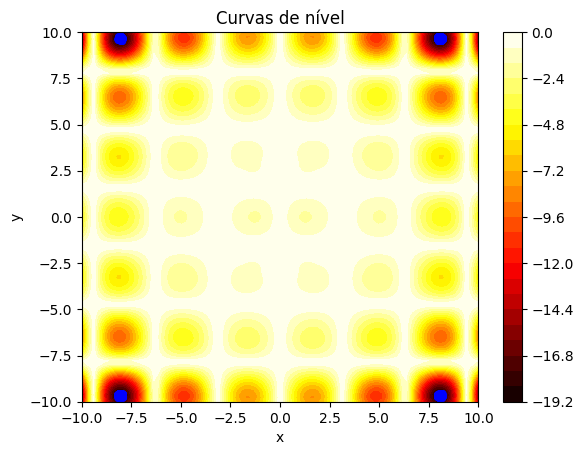

In [38]:
def allowed_interval(**kwargs):
    if -10 <= kwargs['x'] <= 10 and -10 <= kwargs['y'] <= 10:
        return True
    return False

alg = ESAlgorithm()
alg.set_evaluation_expression("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))")
alg.set_variable_bounds("x", 10, True, -10, True)
alg.set_variable_bounds("y", 10, True, -10, True)


res = alg.populational_non_isotropic_ES( dimension_gen_interval=(-10, 10), sigma_var=0.5, iter=10, seed=0, num_parents=1000, num_offspring=2000)

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]
print('\n'.join([str(d) for d in res]))


@np.vectorize
def f(x,y):
    return parser.parse("- abs (sin(x)*cos(y)*exp(abs(1 - ((sqrt(x^2 +y^2))/PI))))").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-10, 10, n)
y = np.linspace(-10, 10, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 25, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()

#print(x_array)
#print(y_array)

In [45]:
alg = ESAlgorithm()
alg.set_evaluation_expression("100*sqrt(abs(y-0.01*x^2)) + 0.01*abs(x+10)")
alg.set_variable_bounds("x", -5, True, -15, True)
alg.set_variable_bounds("y", 3, True, -3, True)


res = alg.populational_non_isotropic_ES(dimension_gen_interval=(-15, 15), sigma_var=0.5, iter=10, seed=0, num_parents=1000,num_offspring=2000)

{'dim': {'y': 0.3217680957892109, 'x': -5.672367757910518}, 'sigma': {'y': 0.21871017738725887, 'x': 0.36446650845326367}, 'eval': 0.36786805649528276}
{'dim': {'y': 0.5669336206486506, 'x': -7.529592042529866}, 'sigma': {'y': 0.019996140480834396, 'x': 0.047884757579227236}, 'eval': 0.3981022670401793}
{'dim': {'y': 0.25001543296801915, 'x': -5}, 'sigma': {'y': 0.03754297331612207, 'x': 0.41823213047777963}, 'eval': 0.4428481642969295}
{'dim': {'y': 0.2500295408618578, 'x': -5}, 'sigma': {'y': 0.0024356364152339997, 'x': 0.31824875884390075}, 'eval': 0.5935150582808347}
{'dim': {'y': 0.2508190789224886, 'x': -5.008605261647167}, 'sigma': {'y': 0.2574013784299067, 'x': 0.38889834947742274}, 'eval': 0.6994349055388779}
{'dim': {'y': 0.2500605813675408, 'x': -5}, 'sigma': {'y': 0.07818251350616046, 'x': 0.3725929186394265}, 'eval': 0.8283403339207059}
{'dim': {'y': 0.251126059226724, 'x': -5.01053987265997}, 'sigma': {'y': 0.006975361956751613, 'x': 0.11232525928059497}, 'eval': 0.892278

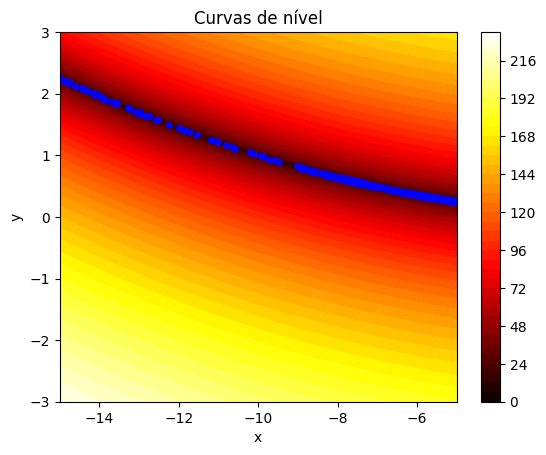

In [46]:

x_array = [i['dim']['x'] for i in res]
y_array = [i['dim']['y'] for i in res]
print('\n'.join([str(d) for d in res]))

@np.vectorize
def f(x,y):
    return parser.parse("100*sqrt(abs(y-0.01*x^2)) + 0.01*abs(x+10)").evaluate({"x":x, "y":y})

n = 100
x = np.linspace(-15, -5, n)
y = np.linspace(-3, 3, n)
X, Y = np.meshgrid(x, y)


fig,ax=plt.subplots(1,1)
cp = ax.contourf(X, Y, f(X, Y), 40, cmap=plt.cm.hot)
fig.colorbar(cp) # Add a colorbar to a plot
ax.plot(x_array, y_array, 'bo',markersize=4)
ax.set_title('Curvas de nível')
ax.set_xlabel('x')
ax.set_ylabel('y')
plt.show()
